# Elementwise operations

## With scalars

In [2]:
import numpy as np

a = np.array([1,2,3,4])
a + 1

array([2, 3, 4, 5])

In [3]:
10**a ## expotential

array([   10,   100,  1000, 10000], dtype=int32)

In [4]:
b = np.ones(4) + 1
b

array([ 2.,  2.,  2.,  2.])

In [5]:
a - b

array([-1.,  0.,  1.,  2.])

In [6]:
a * b

array([ 2.,  4.,  6.,  8.])

In [7]:
j = np.arange(5)
3**(j+1)-j

array([  3,   8,  25,  78, 239])

A small time benchmark: element-wise operation with np is about 15 times faster on the tested machine.

In [8]:
a = np.arange(10000)
%timeit a + 1

24.3 µs ± 6.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
an = range(1000)
%timeit [i+1 for i in an]

192 µs ± 5.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Note array multiplication is not matrix multiplication

In [10]:
c = np.ones((3,3))
c*c ## array multip

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [11]:
c.dot(c) ## .dot does matrix multiplication

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

In [12]:
[2**0, 2**1, 2**2, 2**3, 2**4]

[1, 2, 4, 8, 16]

In [13]:
j = np.arange(10)
a = 2**(3*j)-j
print(a)

[        1         7        62       509      4092     32763    262138
   2097145  16777208 134217719]


## Other options

In [14]:
a = np.array([1,2,3,4])
b = np.array([4,2,2,3])
a == b

array([False,  True, False, False], dtype=bool)

In [15]:
a >= b

array([False,  True,  True,  True], dtype=bool)

In [16]:
## Array-wise comparisons with np.array
a = np.array([1,2,3,4])
b = np.array([4,2,2,4])
c = np.array([1,2,3,4])

np.array_equal(a,b)


False

In [17]:
np.array_equal(c, a)

True

In [18]:
# Logical and and or
a = np.array([0,0,1,1], dtype=bool)
b = np.array([0,1,0,1], dtype=bool)
np.logical_and(a,b)

array([False, False, False,  True], dtype=bool)

In [19]:
np.logical_or(a,b)

array([False,  True,  True,  True], dtype=bool)

In [20]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [21]:
np.log(a)

/mnt/projects/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436])

In [22]:
np.exp(a)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

In [23]:
a = np.triu(np.ones((3,3)),1)
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [24]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

Note that __transpose__ is a view, but a copy.

In [25]:
a = np.array((0,1,2,3+1e-6))
b = np.array((0,1,2-1e-6,3))
np.array_equal(a,b)

False

In [26]:
np.allclose(a,b)

True

## Basic reductions

In [27]:
x = np.array([3,4,5,6])
np.sum(x)

18

In [28]:
x.sum()

18

### Sum by rows and by columns

In [29]:
x = np.array([[1,3],[4,5]])
x

array([[1, 3],
       [4, 5]])

In [30]:
x.sum(axis=0) ## columns - first dimension!! Different from R

array([5, 8])

In [31]:
x[:,0].sum(), x[:,1].sum()

(5, 8)

In [32]:
x.sum(axis=1) ## rows - the second dimension!! Different from R

array([4, 9])

In [33]:
x[0,:].sum(), x[1,:].sum()

(4, 9)

In [34]:
## Example of high-dimensional arrays
xh = np.random.rand(2,2,2)
xh

array([[[ 0.72532914,  0.06192427],
        [ 0.99256888,  0.51537362]],

       [[ 0.57135305,  0.8491377 ],
        [ 0.2115729 ,  0.30246229]]])

In [35]:
xh.sum(axis=2)

array([[ 0.78725341,  1.50794249],
       [ 1.42049075,  0.5140352 ]])

In [36]:
xh.sum(axis=1)

array([[ 1.71789802,  0.57729788],
       [ 0.78292595,  1.15159999]])

In [37]:
xh.sum(axis=0)

array([[ 1.29668219,  0.91106197],
       [ 1.20414178,  0.81783591]])

In [38]:
xh[0,1,:].sum()

1.5079424933357679

### Max and min, and argmax and argmin

In [39]:
x = np.array([1,3,5,2])
x.min()

1

In [40]:
x.max()

5

In [41]:
x.argmin() ## which.min in R

0

In [42]:
x.argmax()

2

### Logical operations

In [43]:
np.all([True, True, False])

False

In [44]:
np.any([True, True, False])

True

In [45]:
a = np.zeros((100,100))
np.any(a != 0)

False

In [46]:
## np.all() is equal to boolarray.all()
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = b + 1
((a <= b) & (b <= c)).all()

True

In [47]:
np.all(((a <= b) & (b <= c)))

True

### Statistics

In [48]:
x = np.array([1,2,3,1])
x.mean()

1.75

In [49]:
## note that the median is not a method of array, but rather a function
np.median(x)

1.5

In [50]:
## though there is also a function with the same name
np.mean(x)

1.75

In [51]:
x.std() ## full population standard deviation!!

0.82915619758884995

In [52]:
np.std(x, ddof=1) ## this is the '''normal''' sample s.d. like in R

0.9574271077563381

In [53]:
y = np.array([[1,2,3],[6,7,8]])
np.median(y, axis=1) ## the second dimension, row

array([ 2.,  7.])

In [54]:
np.median(y, axis=0) ## the first dimension, col

array([ 3.5,  4.5,  5.5])

In [55]:
np.median(y, axis=-1) ## the last dimension, row

array([ 2.,  7.])

### Worked example of statistics

In [56]:
!cat data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


In [57]:
pop = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = pop.T ## trick: column to variables

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline

/mnt/projects/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


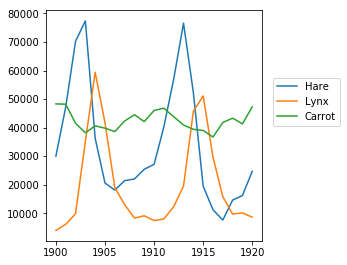

In [59]:
plt.axes([0.2, 0.1, 0.5, 0.8]) ## note it is axes, not axis
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=[1.05, 0.5])

In [60]:
pop

array([[  1900.,  30000.,   4000.,  48300.],
       [  1901.,  47200.,   6100.,  48200.],
       [  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1905.,  20600.,  41700.,  39800.],
       [  1906.,  18100.,  19000.,  38600.],
       [  1907.,  21400.,  13000.,  42300.],
       [  1908.,  22000.,   8300.,  44500.],
       [  1909.,  25400.,   9100.,  42100.],
       [  1910.,  27100.,   7400.,  46000.],
       [  1911.,  40300.,   8000.,  46800.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.],
       [  1916.,  11200.,  29700.,  36700.],
       [  1917.,   7600.,  15800.,  41800.],
       [  1918.,  14600.,   9700.,  43300.],
       [  1919.,  16200.,  10100.,  41300.],
       [  1920.,  24700.,   8600.,  47300.]])

In [61]:
populations = pop[:, 1:]
populations

array([[ 30000.,   4000.,  48300.],
       [ 47200.,   6100.,  48200.],
       [ 70200.,   9800.,  41500.],
       [ 77400.,  35200.,  38200.],
       [ 36300.,  59400.,  40600.],
       [ 20600.,  41700.,  39800.],
       [ 18100.,  19000.,  38600.],
       [ 21400.,  13000.,  42300.],
       [ 22000.,   8300.,  44500.],
       [ 25400.,   9100.,  42100.],
       [ 27100.,   7400.,  46000.],
       [ 40300.,   8000.,  46800.],
       [ 57000.,  12300.,  43800.],
       [ 76600.,  19500.,  40900.],
       [ 52300.,  45700.,  39400.],
       [ 19500.,  51100.,  39000.],
       [ 11200.,  29700.,  36700.],
       [  7600.,  15800.,  41800.],
       [ 14600.,   9700.,  43300.],
       [ 16200.,  10100.,  41300.],
       [ 24700.,   8600.,  47300.]])

In [62]:
populations.mean(axis=0) ## average

array([ 34080.95238095,  20166.66666667,  42400.        ])

In [63]:
populations.std(axis=0, ddof=1) ## sample standard deviations

array([ 21413.98185877,  16655.99991995,   3404.55577132])

In [64]:
np.argmax(populations, axis=1) ## which species has the highest population each year

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2], dtype=int32)

## Diffusion using a random walk algorithm

In [65]:
n_stories = 1000 ## number of walkers
t_max = 200  ## time during which we follow the walker

t = np.arange(t_max)
steps = 2 * np.random.randint(0, 2, (n_stories, t_max)) -1
np.unique(steps)

array([-1,  1])

In [66]:
positions = np.cumsum(steps, axis=1) ## axis=1, dimension of time
sq_distance = positions ** 2

In [67]:
msq = np.mean(sq_distance, axis=0)

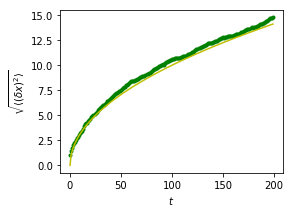

In [68]:
plt.figure(figsize=(4,3))
plt.plot(t, np.sqrt(msq), 'g.', t, np.sqrt(t), 'y-')
plt.xlabel(r"$t$")
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$")

# Broadcasting

It’s possible to do operations on arrays of different sizes if NumPy can transform these arrays so that they all have
the same size: this conversion is called broadcasting.

In [69]:
a = np.tile(np.arange(0,40,10), (3,1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [70]:
b = np.array([0,1,2])
b

array([0, 1, 2])

In [71]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [72]:
a = np.ones((4,5))
a

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [73]:
a[0] = 2 ## implicit broadcasting: we assign an array of dimension 0 to an array of dimension 1
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

Use np.newaxis to add dimenstion

In [74]:
a = np.arange(0,40,10)
a.shape

(4,)

In [75]:
a = a[:, np.newaxis]
a.shape
a

array([[ 0],
       [10],
       [20],
       [30]])

In [76]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## Worked Example: Route 66

In [77]:
mileposts = np.array([0,198, 303, 736, 871, 1175, 1475, 544, 1913, 2448])

In [81]:
## an intereseting way to generate pair-wise distance matrix given a vector
distance_array = abs(mileposts-mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475,  544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277,  346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172,  241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  192, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  327, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  631,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,  931,  438,  973],
       [ 544,  346,  241,  192,  327,  631,  931,    0, 1369, 1904],
       [1913, 1715, 1610, 1177, 1042,  738,  438, 1369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973, 1904,  535,    0]])